In [37]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt


sys.path.append('../elpv-dataset/utils')
from elpv_reader import load_dataset
images, probs, types = load_dataset()

In [38]:
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [39]:
# Create a figure with two subplots
def displayTwoPlots(img1, img2, cmap1='gray',cmap2='gray'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.set_title('Original Image')
    ax1.imshow(images[0], cmap='gray')

    # Display the new image
    ax2.set_title('New Image')
    ax2.imshow(img2, cmap='gray')

    # Hide the axes and show the figure
    ax1.axis('off')
    ax2.axis('off')
    plt.show()

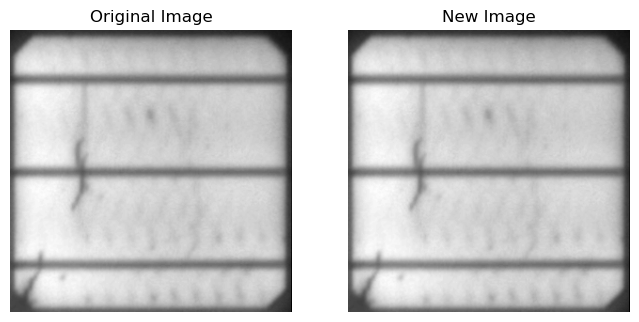

In [40]:
# Contrast stretching
b = images[0]

# Get height and h,w
min = 0
max = 255


stretched = ((b - np.min(b)) / (np.max(b) - np.min(b))) * (max - min) + min


displayTwoPlots(images[0],b)

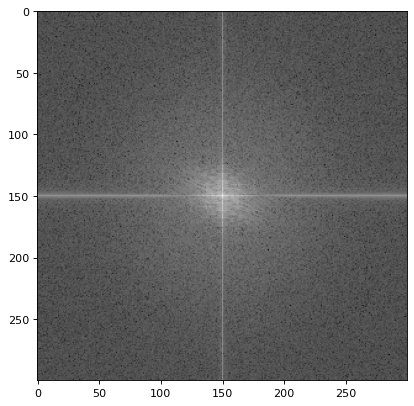

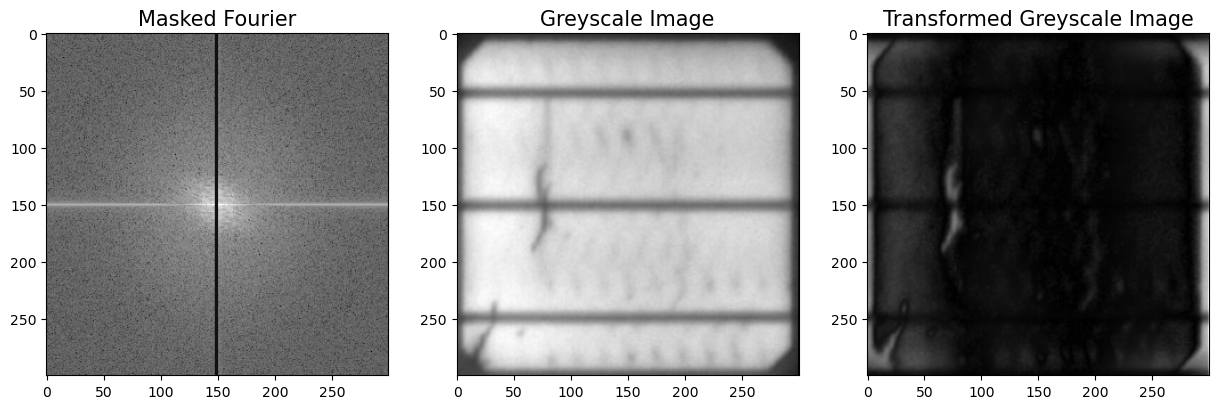

In [41]:
#Try some fourier removing of vertical df/dx
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(image))
    dark_image_grey_fourier[:225, 148:151] = i
    dark_image_grey_fourier[-225:,148:151] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size)
    

img_fourier = np.fft.fftshift(np.fft.fft2(b))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_fourier)), cmap='gray')

fourier_masker_hor(images[0],1)





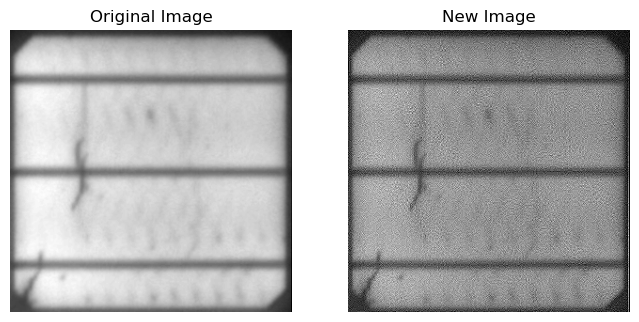

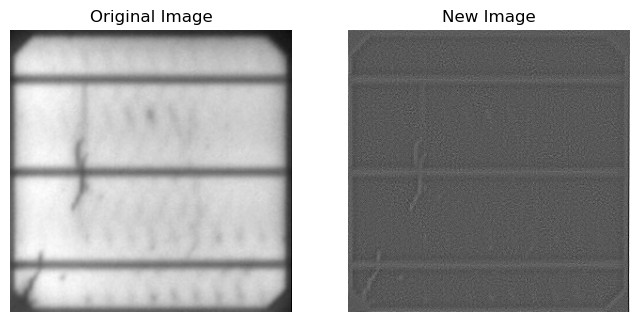

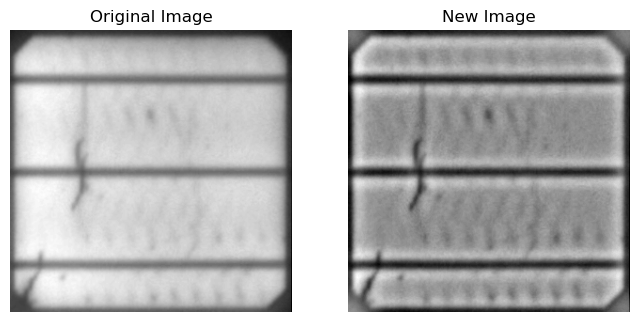

In [42]:
#sharpening the image
kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#img_sharp = cv2.filter2D(src=b,ddepth=1,kernel=kernel)
img_sharp = cv2.filter2D(b,-1,kernel)
for i in range(1):
    img_sharp = cv2.filter2D(img_sharp,-1,kernel)

displayTwoPlots(b,img_sharp)

# laplacian sharpening
img_sharp_lap = cv2.Laplacian(b, cv2.CV_64F) 
displayTwoPlots(b,img_sharp_lap)

# approach
aw = cv2.addWeighted(b, 4, cv2.blur(b, (30, 30)), -4, 128)
displayTwoPlots(b,aw)


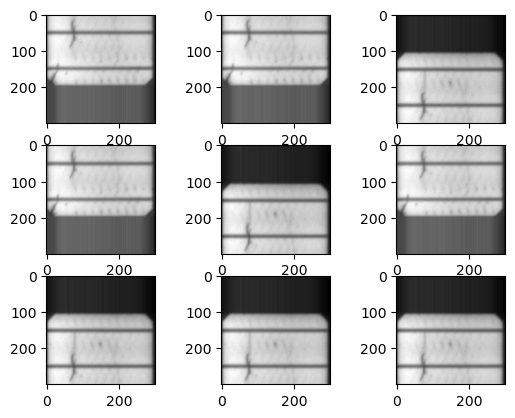

In [54]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

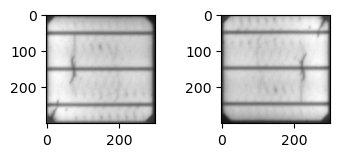

In [58]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

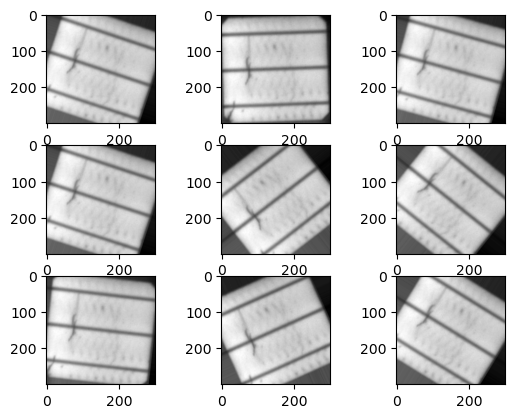

In [63]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# Lightness
datagen = ImageDataGenerator(rotation_range=45, fill_mode='nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

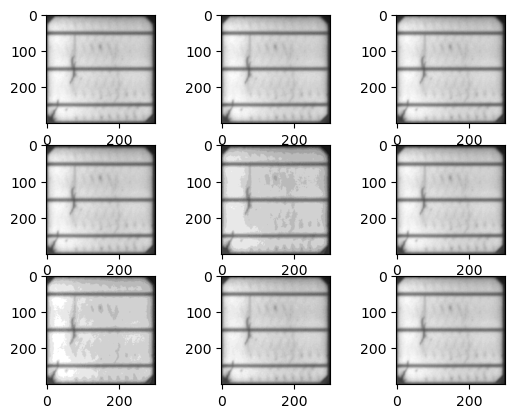

In [73]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# Brightness
datagen = ImageDataGenerator(brightness_range=[0.1,3.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()